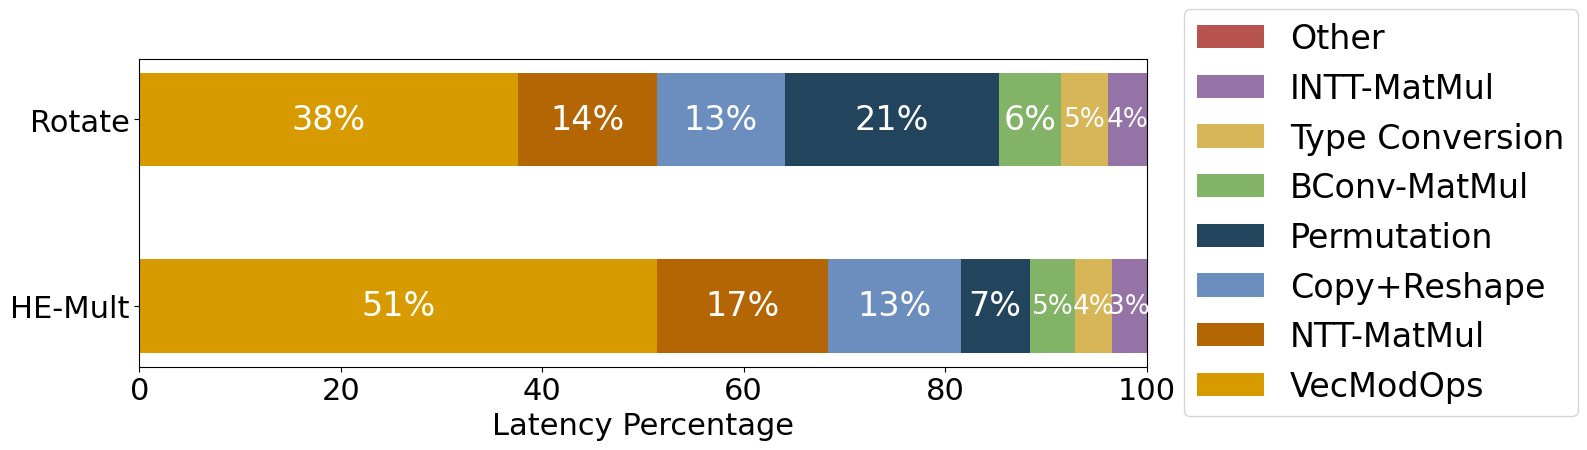

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Font size settings
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

# Original color list
color_list = ["#23445D", "#6C8EBF", "#82B366", "#D79B00", "#B85450", "#9673A6", "#B46504", "#D6B656"]

# Categories ordered by descending percentage for HEMul (Left to Right)
labels = [
    "VecModOps", "NTT-MatMul", "Copy+Reshape", "Permutation", 
    "BConv-MatMul", "Type Conversion", "INTT-MatMul", "Other"
]


import io
import pandas as pd
csv_data = """Category,HEMul,Rotate
VecModOps,51.40,37.56
NTT-MatMul,16.93,13.80
Copy+Reshape,13.19,12.72
Permutation,6.85,21.23
BConv-MatMul,4.54,6.20
Type Conversion,3.66,4.62
INTT-MatMul,3.42,3.88
Other,0.0,0.0"""
df_breakdown = pd.read_csv(io.StringIO(csv_data), index_col=0)
data = {label: df_breakdown.loc[label].tolist() for label in df_breakdown.index}

category_colors = {
    "VecModOps": color_list[3],
    "NTT-MatMul": color_list[6],
    "Copy+Reshape": color_list[1],
    "Permutation": color_list[0],
    "BConv-MatMul": color_list[2],
    "Type Conversion": color_list[7],
    "INTT-MatMul": color_list[5],
    "Other": color_list[4]
}

fig = plt.figure(figsize=[13, 4])
ax = plt.subplot(111)

y_pos = [0, 1]
bar_width = 0.5
lefts = np.zeros(2)
legend_handles = []

# Plot stacked bars in the new descending order
for label in labels:
    widths = np.array(data[label])
    p = plt.barh(y_pos, widths, left=lefts, color=category_colors[label], height=bar_width)
    legend_handles.append(p)
    
    # Print Percentage Values inside bars
    threshold = 3.0 # Min % to display text
    threshold2 = 5.0 # Min % to display text
    for i in range(len(y_pos)):
        if widths[i] > threshold2:
            plt.text(lefts[i] + widths[i]/2, y_pos[i], f'{widths[i]:.0f}%', 
                     ha='center', va='center', fontsize=24, color='white')
        elif widths[i] > threshold:
            plt.text(lefts[i] + widths[i]/2, y_pos[i], f'{widths[i]:.0f}%', 
                     ha='center', va='center', fontsize=19, color='white')
    
    lefts += widths

# Legend and Labels (Legend order reversed to match stack visually top-to-bottom/right-to-left)
plt.legend(legend_handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 0.5), loc='center left', ncol=1, fontsize=24)

## Display Settings
plt.xlim([0, 100])
plt.yticks(y_pos, ["HE-Mult", "Rotate"], fontsize=BIGGER_SIZE)
plt.xlabel("Latency Percentage", size=BIGGER_SIZE)
plt.xticks(fontsize=BIGGER_SIZE)

plt.savefig('TPUv6e_Profiled_Latency.pdf', bbox_inches="tight", transparent=True)
plt.show()

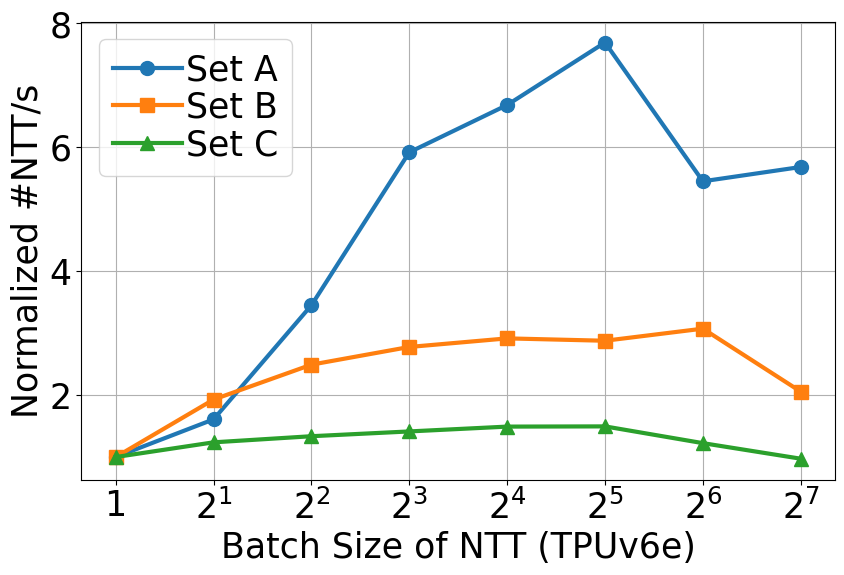

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Increase global font size for clarity
plt.rcParams.update({'font.size': 14})
color_list = ["#2077B4", "#FF7F0F", "#2BA02C",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# Define batch sizes and TPUv6e data
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
tpuv6e_data = {
     r"Set A": [1, 1.608161566, 3.449850501, 5.918773946, 6.682383476, 7.691311924, 5.450952717, 5.681896445],
     r"Set B": [1, 1.927877308, 2.491346468, 2.776995875, 2.915570143, 2.877274584, 3.072525688, 2.055818001],
     r"Set C": [1, 1.237586397, 1.336292217, 1.413518565, 1.49155428, 1.494978599, 1.224562793, 0.973250898]
}

# Define distinct colors and marker shapes for each set
set_colors = {
    r"Set A": '#2077B4',
    r"Set B": '#FF7F0F',
    r"Set C": '#2BA02C'
}

set_markers = {
    r"Set A": 'o',
    r"Set B": 's',
    r"Set C": '^'
}

plt.figure(figsize=(9, 6.3))

# Plot each set with thicker lines and larger markers
for set_name, performance in tpuv6e_data.items():
    plt.plot(batch_sizes, performance,
             label=set_name,
             color=set_colors[set_name],
             marker=set_markers[set_name],
             linewidth=3,      # Thicker lines
             markersize=10,    # Larger markers
             linestyle='-')

plt.xlabel("Batch Size of NTT (TPUv6e)")
plt.ylabel("Normalized #NTT/s")
# plt.title("TPUv4 Normalized Performance vs Batch Size")
plt.xscale('log', base=2)  # Use logarithmic scale to reflect the doubling of batch sizes

# Add x-labels in power of 2 math format
plt.xticks(batch_sizes, ["1" if x == 1 else f"$2^{{{int(np.log2(x))}}}$" for x in batch_sizes])

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.legend(fontsize=25, columnspacing=0.1,labelspacing=0.1,handletextpad=0.1)
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('font', size=25)          # controls default text sizes
plt.tight_layout()
plt.savefig('batch_effect.pdf', bbox_inches="tight", transparent=True) 
plt.show()

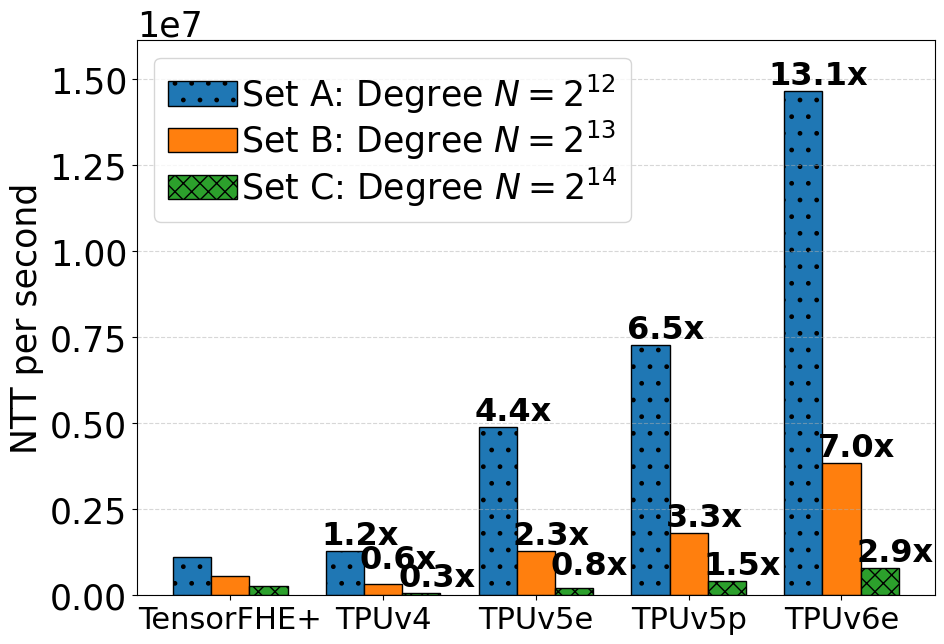

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1) Prepare data
# -------------------------------
# New order of categories:
# "TensorFHE", "CROSS (TPUv4)", "CROSS (TPUv5e)", "CROSS (TPUv5p)", "CROSS (TPUv6e)"
patterns = [ "//" , "\\\\" , "" , "." , "*"  , "xx", "o", "O", "o-", " " ]
categories = [
    "TensorFHE+",
    "TPUv4",
    "TPUv5e",
    "TPUv5p",
    "TPUv6e"
]

# Each set now has 5 data points in the order above.
# Set A
setA = [
    1116019,    # TensorFHE+
    1283806.141,# CROSS (TPUv4)
    4878048.78, # CROSS (TPUv5e)
    7274062.978,# CROSS (TPUv5p)
    14668451.18 # CROSS (TPUv6)    
    ]
# Set B
setB = [
    546431,
    323444.1019, # CROSS (TPUv4)
    1276458.326, # CROSS (TPUv5e)
    1812391.769, # CROSS (TPUv5p)
    3850422.458  # CROSS (TPUv6)    
]
# Set C
setC = [
    275632,
    75253.73795,# CROSS (TPUv4)
    222581.6591,# CROSS (TPUv5e)
    407219.4081,# CROSS (TPUv5p)
    793467.0682 # CROSS (TPUv6)    
]

# -------------------------------
# 2) Create a grouped bar chart
# -------------------------------
x = np.arange(len(categories))  # positions for the 5 categories
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 7))

# Offsets for the three sets (A, B, C) within each group
xA = x - bar_width
xB = x
xC = x + bar_width

color_list = ["#6C8EBF", "#82B366", "#D79B00"]
barsA = ax.bar(xA, setA, width=bar_width, edgecolor="black", label=r"Set A: Degree $N=2^{12}$", hatch=patterns[3])
barsB = ax.bar(xB, setB, width=bar_width, edgecolor="black", label=r"Set B: Degree $N=2^{13}$", hatch=patterns[2])
barsC = ax.bar(xC, setC, width=bar_width, edgecolor="black", label=r"Set C: Degree $N=2^{14}$", hatch=patterns[5])

# -------------------------------
# 3) Add speedup texts on CROSS bars
#    Speedup = CROSS_value / TensorFHE_value
#    (TensorFHE is at index 0 for each set.)
# -------------------------------
def annotate_speedup(bars, set_data):
    baseline = set_data[0]  # TensorFHE value
    for i in range(1, len(set_data)):
        cross_val = set_data[i]
        speedup = cross_val / baseline
        
        bar = bars[i]
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_height()
        
        # Place the speedup text slightly above the bar with larger font size.
        ax.text(
            x_pos+0.1, 
            y_pos*1.85 if speedup < 1 and speedup > 0.47 else y_pos, 
            f"{speedup:.1f}x",
            ha="center", 
            va="bottom",
            fontsize=23,
            fontweight="bold"
        )

# Annotate CROSS bars (indices 1 to 4) for each set
annotate_speedup(barsA, setA)
annotate_speedup(barsB, setB)
annotate_speedup(barsC, setC)

# -------------------------------
# 4) Format axes and labels with larger fonts
# -------------------------------
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, ha="center", fontsize=22)
# ax.set_yticklabels(categories, rotation=0, ha="center", fontsize=20)
ax.set_ylabel("NTT per second", fontsize=25)
# ax.set_title("TensorFHE vs. CROSS on Various TPU Chips (Grouped by Set)", fontsize=16)
ax.legend(fontsize=25, columnspacing=0.1,labelspacing=0.1,handletextpad=0.1)
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('font', size=25)          # controls default text sizes
# Add a light horizontal grid for readability
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, max(setA)*1.1)
plt.tight_layout()
plt.savefig('performance_compared_tensorFHE_barrett_reduction.pdf', bbox_inches="tight", transparent=True) 
plt.show()

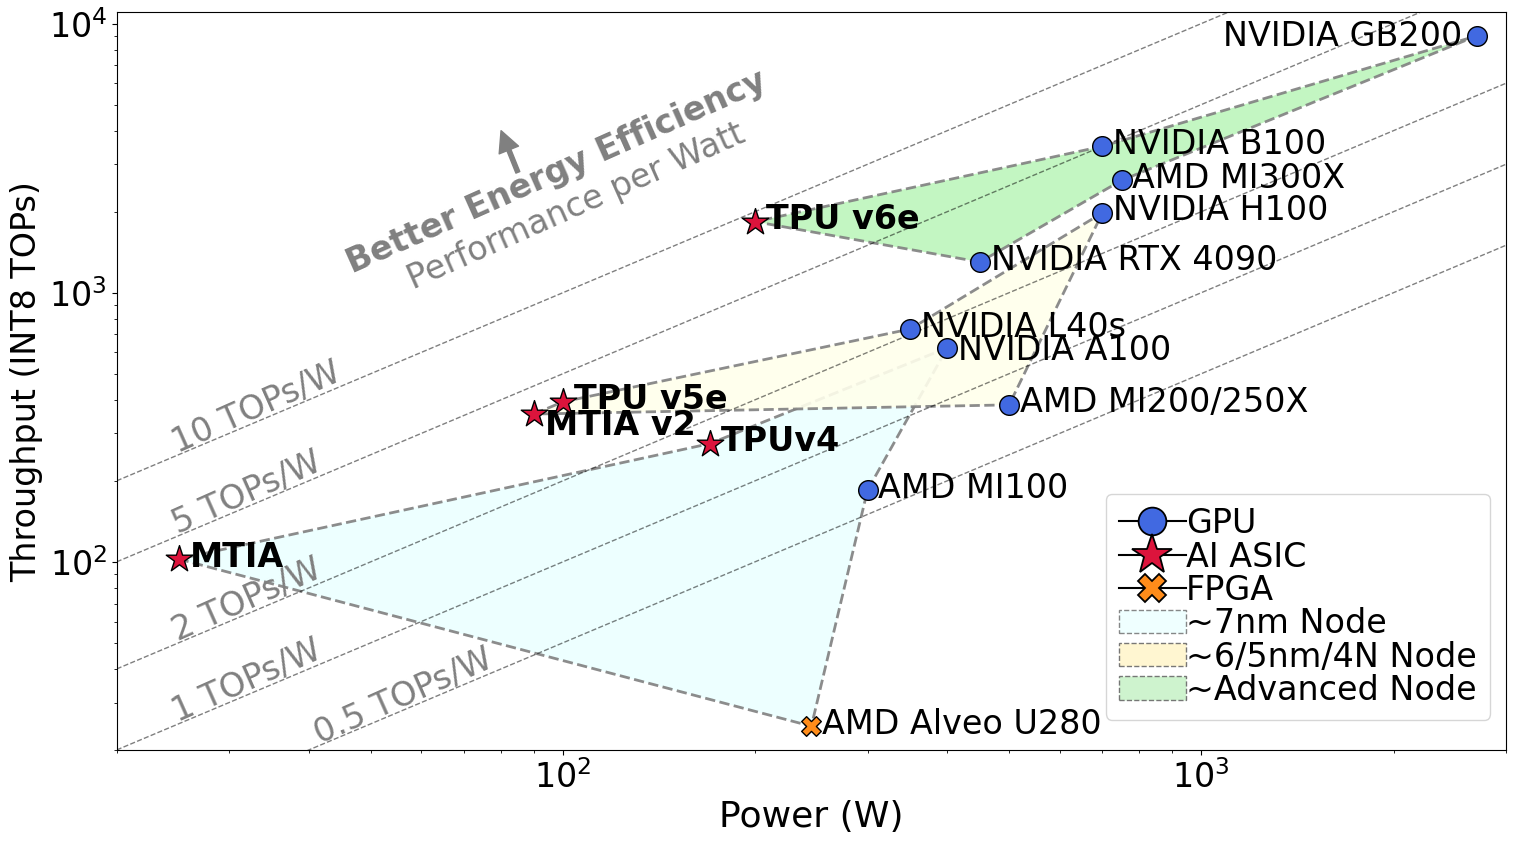

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D

# Data provided by the user
data = {
    'Device': [
        'AMD MI100', 'NVIDIA A100', 'AMD Alveo U280', 'TPUv4', 'MTIA',
        'AMD MI200/250X', 'NVIDIA H100', 'NVIDIA L40s', 'TPU v5e', 'MTIA v2',
        'AMD MI300X', 'NVIDIA B100', 'NVIDIA RTX 4090', 'NVIDIA GB200', 'TPU v6e'
    ],
    'Type': [
        'GPU', 'GPU', 'FPGA', 'AI ASIC', 'AI ASIC',
        'GPU', 'GPU', 'GPU', 'AI ASIC', 'AI ASIC',
        'GPU', 'GPU', 'GPU', 'GPU', 'AI ASIC'
    ],
    'Technology Node Category': [
        '7nm', '7nm', '7nm', '7nm', '7nm',
        '6/5nm/4N', '6/5nm/4N', '6/5nm/4N', '6/5nm/4N', '6/5nm/4N',
        'Advanced', 'Advanced', 'Advanced', 'Advanced', 'Advanced'
    ],
    'Throughput (INT8 TOPs)': [
        184.6, 624, 24.5, 275, 102.4,
        383, 1980, 733, 393, 354,
        2614.9, 3500, 1300, 9000, 1836
    ],
    'Power (W)': [
        300, 400, 245, 170, 25,
        500, 700, 350, 100, 90,
        750, 700, 450, 2700, 200
    ]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Define polygon vertices based on the new data for each technology node
# These points are selected to form a convex hull around the data for each category
poly_7nm = df[df['Technology Node Category'] == '7nm'][['Power (W)', 'Throughput (INT8 TOPs)']].values
poly_7nm = poly_7nm[[4, 2, 0, 1, 3], :] # Order: MTIA, FAB, MI100, A100, TPUv4

poly_6nm = df[df['Technology Node Category'] == '6/5nm/4N'][['Power (W)', 'Throughput (INT8 TOPs)']].values
poly_6nm = poly_6nm[[4, 3, 2, 1, 0], :] # Order: MTIA v2, TPU v5e, L40s, H100, MI200

poly_advanced = df[df['Technology Node Category'] == 'Advanced'][['Power (W)', 'Throughput (INT8 TOPs)']].values
poly_advanced = poly_advanced[[2, 4, 1, 3, 0], :] # Order: RTX 4090, TPU v6e, B100, GB200, MI300X

# Create the plot
fig, ax = plt.subplots(figsize=(16, 9))

# Add polygons for technology nodes
ax.add_patch(Polygon(poly_7nm, closed=True, facecolor='#EBFFFF', edgecolor='#808080', linestyle='--', linewidth=2, alpha=0.9, label='~7nm Node'))
ax.add_patch(Polygon(poly_6nm, closed=True, facecolor='#FFFFEC', edgecolor='#808080', linestyle='--', linewidth=2, alpha=0.9, label='~6/5nm/4N Node'))
ax.add_patch(Polygon(poly_advanced, closed=True, facecolor='#BDF5BC', edgecolor='#808080', linestyle='--', linewidth=2, alpha=0.9, label='~Advanced Node'))

# Plot the data points from the DataFrame
for index, row in df.iterrows():
    power = row['Power (W)']
    throughput = row['Throughput (INT8 TOPs)']
    device_type = row['Type']

    if device_type == 'GPU':
        ax.scatter(power, throughput, marker='o', s=200, color='#4169E1', edgecolors='black', zorder=5)
    elif device_type == 'AI ASIC':
        ax.scatter(power, throughput, marker='*', s=400, color='#DC143C', edgecolors='black', zorder=5)
    elif device_type == 'FPGA':
        ax.scatter(power, throughput, marker='X', s=200, color='#ff8c1a', edgecolors='black', zorder=5)

    # Add device name labels
    label_text = row['Device']
    label_kwargs = {'fontsize': 24}
    if device_type == 'AI ASIC':
        label_kwargs['fontweight'] = 'bold'
    if row['Device'] == 'MTIA v2':
        ax.text(power * 1.04, throughput*0.84, label_text, **label_kwargs)
    elif row['Device'] == 'NVIDIA GB200':
        ax.text(power * 0.4, throughput*0.92, label_text, **label_kwargs)
    elif row['Device'] == 'NVIDIA A100':
        ax.text(power * 1.04, throughput*0.90, label_text, **label_kwargs)
    else:
        ax.text(power * 1.04, throughput*0.94, label_text, **label_kwargs)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels
ax.set_xlabel('Power (W)', fontsize=26)
ax.set_ylabel('Throughput (INT8 TOPs)', fontsize=24)

# Add diagonal lines for TOPs/W
x_vals = np.array([20, 3000])
y_vals = x_vals * 0.5
ax.plot(x_vals, y_vals, 'k--', alpha=0.5, lw=1)
ax.text(40, 40 * 0.5, f'{0.5} TOPs/W', rotation=24, fontsize=24,
            ha='left', va='bottom', color='gray')

for tops_per_watt in [1, 2, 5, 10]:
    x_vals = np.array([20, 3000])
    y_vals = x_vals * tops_per_watt
    ax.plot(x_vals, y_vals, 'k--', alpha=0.5, lw=1)
    ax.text(24, 24 * tops_per_watt, f'{tops_per_watt} TOPs/W', rotation=24, fontsize=24,
            ha='left', va='bottom', color='gray')

# Add custom legend for markers and polygons
legend_elements = [
    Line2D([0], [0], marker='o', color='k', label='GPU', markerfacecolor='#4169E1', markersize=10, markeredgewidth=1.3),
    Line2D([0], [0], marker='*', color='k', label='AI ASIC', markerfacecolor='#DC143C', markersize=15, markeredgewidth=1.3),
    Line2D([0], [0], marker='X', color='k', label='FPGA', markerfacecolor='#ff8c1a', markersize=10, markeredgewidth=1.3),
    plt.Rectangle((0,0),1,1, facecolor='#EBFFFF', edgecolor='dimgray', linestyle='--', alpha=0.8, label='~7nm Node'),
    plt.Rectangle((0,0),1,1, facecolor='#fff6cc', edgecolor='dimgray', linestyle='--', alpha=0.9, label='~6/5nm/4N Node'),
    plt.Rectangle((0,0),1,1, facecolor='#c9f2c9', edgecolor='dimgray', linestyle='--', alpha=0.9, label='~Advanced Node')
]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.7, 0.37), fontsize=24, markerscale=2, columnspacing=0.01,labelspacing=0.01,handletextpad=0.01)

# Add the "Better Energy Efficiency" text and arrow
# Big diagonal annotation
ax.text(45, 2800, "Better Energy Efficiency",
        color="#808080", rotation=24, fontsize=24, fontweight="bold",
        ha="left", va="center", alpha=1)
ax.text(56, 2100, "Performance per Watt",
        color="#808080", rotation=24, fontsize=24,
        ha="left", va="center", alpha=1)
ax.annotate('', xy=(80, 4000), xytext=(85, 2800),
            arrowprops=dict(facecolor='#808080', edgecolor='#808080',
                          alpha=1, width=3, headwidth=15, headlength=15))

# Set axis limits based on the new data range
ax.set_xlim(20, 3000)
ax.set_ylim(20, 11000)
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# Show the plot
plt.tight_layout()
plt.savefig('energy_efficiency_comparison.pdf', bbox_inches="tight", transparent=True)
plt.show()

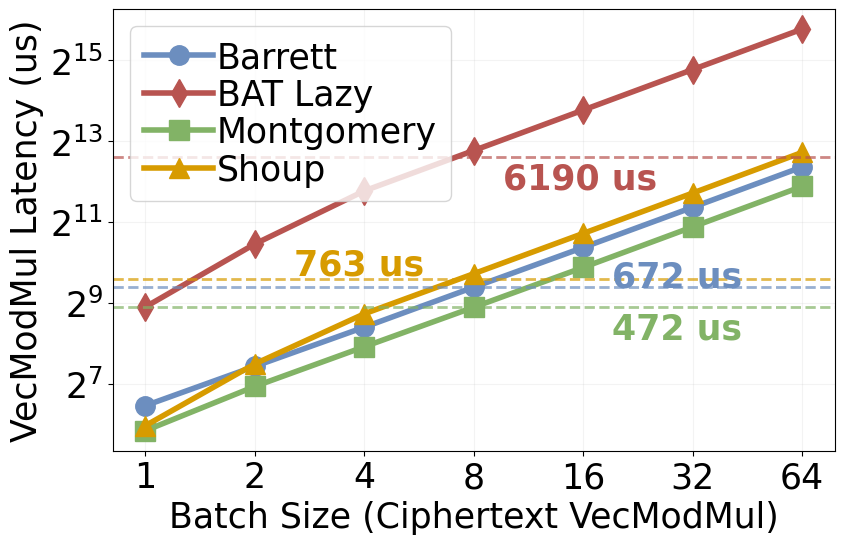

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set global font size and label size to 25
plt.rcParams.update({'font.size': 25})

import io
import pandas as pd
csv_data = """operation_name,batch,algorithm,moduli_count,sample_0
Montgomery_Perf_Batch_1,1,montgomery,51,57.118594
Montgomery_Perf_Batch_2,2,montgomery,51,121.9225
Montgomery_Perf_Batch_4,4,montgomery,51,240.751406
Montgomery_Perf_Batch_8,8,montgomery,51,473.875078
Montgomery_Perf_Batch_16,16,montgomery,51,937.433594
Montgomery_Perf_Batch_32,32,montgomery,51,1877.6875
Montgomery_Perf_Batch_64,64,montgomery,51,3757.92
Barrett_Perf_Batch_1,1,barrett,51,87.696406
Barrett_Perf_Batch_2,2,barrett,51,172.158906
Barrett_Perf_Batch_4,4,barrett,51,336.508906
Barrett_Perf_Batch_8,8,barrett,51,667.841406
Barrett_Perf_Batch_16,16,barrett,51,1319.187422
Barrett_Perf_Batch_32,32,barrett,51,2627.223594
Barrett_Perf_Batch_64,64,barrett,51,5245.168672
Shoup_Perf_Batch_1,1,shoup,51,62.216
Shoup_Perf_Batch_2,2,shoup,51,179.408
Shoup_Perf_Batch_4,4,shoup,51,423.231
Shoup_Perf_Batch_8,8,shoup,51,841.567
Shoup_Perf_Batch_16,16,shoup,51,1679
Shoup_Perf_Batch_32,32,shoup,51,3352
Shoup_Perf_Batch_64,64,shoup,51,6727
BATLazy_Perf_Batch_1,1,bat_lazy,51,476.245
BATLazy_Perf_Batch_2,2,bat_lazy,51,1401.338672
BATLazy_Perf_Batch_4,4,bat_lazy,51,3479.4375
BATLazy_Perf_Batch_8,8,bat_lazy,51,6950.742578
BATLazy_Perf_Batch_16,16,bat_lazy,51,13905.085
BATLazy_Perf_Batch_32,32,bat_lazy,51,27850.65383
BATLazy_Perf_Batch_64,64,bat_lazy,51,55708.52508"""
df = pd.read_csv(io.StringIO(csv_data), index_col=0)

# Map columns to the processing logic
df = df.rename(columns={
    "algorithm": "reduction_type",
    "batch": "batch_size",
    "sample_0": "dur(us)"
})

# Filter data: drop zero durations and include batch size 1
df = df[["dur(us)", "reduction_type", "batch_size"]]
df = df[df["dur(us)"] != 0]
df = df[df["batch_size"] >= 1]

# Aggregate: mean duration per (reduction_type, batch_size)
aggr = df.groupby(["reduction_type", "batch_size"], as_index=False)["dur(us)"].mean()

# Prepare batch sizes (sorted unique)
batch_sizes = sorted(aggr["batch_size"].unique().tolist())

# Build series for each reduction type
types = sorted(aggr["reduction_type"].unique().tolist())
series = {}
for rtype in types:
    subset = aggr[aggr["reduction_type"] == rtype].set_index("batch_size")["dur(us)"]
    series[rtype] = [subset.get(b, np.nan) for b in batch_sizes]

# Style settings
set_colors = {
    "barrett": '#6C8EBF',
    "montgomery": '#82B366',
    "shoup": '#D79B00',
    "bat_lazy": '#B85450'
}
set_markers = {
    "barrett": 'o',
    "montgomery": 's',
    "shoup": '^',
    "bat_lazy": 'd'
}
name_map = {
    "barrett": r"Barrett",
    "montgomery": r"Montgomery",
    "shoup": r"Shoup",
    "bat_lazy": r"BAT Lazy"
}

plt.figure(figsize=(9, 6))

# Plot each set with thicker lines and larger markers
for rtype, performance in series.items():
    plt.plot(batch_sizes, performance,
             label=name_map.get(rtype, rtype),
             color=set_colors.get(rtype, "#23445D"),
             marker=set_markers.get(rtype, 'o'),
             linewidth=4,
             markersize=14,
             linestyle='-')

# Add geometric mean as horizontal lines with full-digit labels
ax = plt.gca()
for rtype, performance in series.items():
    vals = np.array([v for v in performance if np.isfinite(v) and v > 0])
    if vals.size == 0:
        continue
    gm = float(np.exp(np.mean(np.log(vals))))
    color = set_colors.get(rtype, "#23445D")
    ax.axhline(gm, color=color, linestyle='--', linewidth=2, alpha=0.7)
    
    # Format label as full digits (e.g., 1000 us)
    label_text = f"{gm:.0f} us"
    
    # Position labels to the right of the plot with font size 25
    if rtype == "bat_lazy":
        ax.text(batch_sizes[-1] * 0.15, gm*0.7, label_text, 
                color=color, va='center', ha='left', fontsize=25, fontweight='bold')
    elif rtype == "shoup":
        ax.text(batch_sizes[-1] * 0.04, gm*1.3, label_text, 
                color=color, va='center', ha='left', fontsize=25, fontweight='bold')
    elif rtype == "montgomery":
        ax.text(batch_sizes[-1] * 0.3, gm*0.7, label_text, 
                color=color, va='center', ha='left', fontsize=25, fontweight='bold')
    else:
        ax.text(batch_sizes[-1] * 0.3, gm*1.2, label_text, 
                color=color, va='center', ha='left', fontsize=25, fontweight='bold')

plt.xlabel("Batch Size (Ciphertext VecModMul)", fontsize=25)
plt.ylabel("VecModMul Latency (us)", fontsize=25)

# Use log2 scaling for both axes
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Set ticks and sizes
plt.xticks(batch_sizes, [str(b) for b in batch_sizes], fontsize=25)
plt.yticks(fontsize=25)

# Final styling and legend
plt.legend(fontsize=25, loc='upper left', frameon=True, columnspacing=0.1,labelspacing=0.1,handletextpad=0.1)
plt.grid(True, which="both", ls="-", alpha=0.15)
plt.tight_layout()

# Save output
plt.savefig('vecmodmul_updated_final.pdf', bbox_inches="tight", transparent=True)
plt.show()

Index(['operation_name', 'degree', 'num_limbs', 'batch', 'rows', 'cols',
       'sample_0'],
      dtype='object')


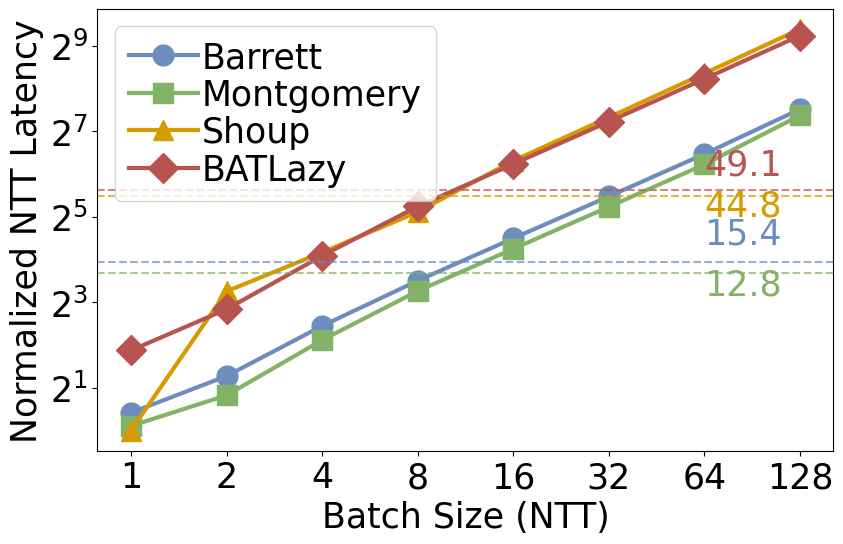

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
# Set global font size for clarity (Updated to 25)
plt.rcParams.update({'font.size': 25})

# Load CSV
# csv_path = "ntt_modular_reduction_test_tpuv6e_singleTC.csv"
# df = pd.read_csv(csv_path)
csv_data = """operation_name,degree,num_limbs,batch,rows,cols,sample_0
ntt_montgomery_batch_1,65536,51,1,256,256,231.505156
ntt_montgomery_batch_2,65536,51,2,256,256,380.140078
ntt_montgomery_batch_4,65536,51,4,256,256,929.821094
ntt_montgomery_batch_8,65536,51,8,256,256,2057.800078
ntt_montgomery_batch_16,65536,51,16,256,256,4076.630078
ntt_montgomery_batch_32,65536,51,32,256,256,8053.43125
ntt_montgomery_batch_64,65536,51,64,256,256,15996.31875
ntt_montgomery_batch_128,65536,51,128,256,256,35426.848672
ntt_barrett_batch_1,65536,51,1,256,256,286.69125
ntt_barrett_batch_2,65536,51,2,256,256,519.197578
ntt_barrett_batch_4,65536,51,4,256,256,1169.772656
ntt_barrett_batch_8,65536,51,8,256,256,2432.512578
ntt_barrett_batch_16,65536,51,16,256,256,4833.646328
ntt_barrett_batch_32,65536,51,32,256,256,9530.545078
ntt_barrett_batch_64,65536,51,64,256,256,18940.72125
ntt_barrett_batch_128,65536,51,128,256,256,39150.853828
ntt_shoup_batch_1,65536,51,1,256,256,214.481172
ntt_shoup_batch_2,65536,51,2,256,256,2047.253594
ntt_shoup_batch_4,65536,51,4,256,256,3850.156328
ntt_shoup_batch_8,65536,51,8,256,256,7409.773594
ntt_shoup_batch_16,65536,51,16,256,256,16975.743672
ntt_shoup_batch_32,65536,51,32,256,256,34313.6675
ntt_shoup_batch_64,65536,51,64,256,256,69879.767422
ntt_shoup_batch_128,65536,51,128,256,256,143343.97625
ntt_BATLazy_batch_1,65536,51,1,256,256,786.668828
ntt_BATLazy_batch_2,65536,51,2,256,256,1532.490078
ntt_BATLazy_batch_4,65536,51,4,256,256,3643.741406
ntt_BATLazy_batch_8,65536,51,8,256,256,8107.122422
ntt_BATLazy_batch_16,65536,51,16,256,256,16094.763672
ntt_BATLazy_batch_32,65536,51,32,256,256,32028.928828
ntt_BATLazy_batch_64,65536,51,64,256,256,63977.28875
ntt_BATLazy_batch_128,65536,51,128,256,256,128968.729922"""
df = pd.read_csv(io.StringIO(csv_data))

# Extract reduction type and batch size from the operation_name
def extract_reduction_type(op_name):
    if 'montgomery' in op_name:
        return 'montgomery'
    elif 'barrett' in op_name:
        return 'barrett'
    elif 'shoup' in op_name:
        return 'shoup'
    elif 'BATLazy' in op_name:
        return 'BATLazy'
    return 'unknown'

df['reduction_type'] = df['operation_name'].apply(extract_reduction_type)
df['batch_size'] = df['batch']
df['dur(us)'] = df['sample_0']

# Keep needed columns and filter
df = df[["dur(us)", "reduction_type", "batch_size"]]
df = df[df["dur(us)"] > 0]
df = df[df["batch_size"] <= 2**7]

# Normalization based on minimum latency found in the set
min_latency = df["dur(us)"].min()
df["dur(us)"] = df["dur(us)"] / min_latency

# Aggregate: mean duration per (reduction_type, batch_size)
aggr = df.groupby(["reduction_type", "batch_size"], as_index=False)["dur(us)"].mean()

# Prepare batch sizes (sorted unique)
batch_sizes = sorted(aggr["batch_size"].unique().tolist())

# Build series for each reduction type
types = sorted(aggr["reduction_type"].unique().tolist())
series = {}
for rtype in types:
    subset = aggr[aggr["reduction_type"] == rtype].set_index("batch_size")["dur(us)"]
    series[rtype] = [subset.get(b, np.nan) for b in batch_sizes]

# Styles and mapping (Updated to include BATLazy)
set_colors = {
    "barrett": '#6C8EBF',
    "montgomery": '#82B366',
    "shoup": '#D79B00',
    "BATLazy": '#B85450' # Red-ish color
}
set_markers = {
    "barrett": 'o',
    "montgomery": 's',
    "shoup": '^',
    "BATLazy": 'D' # Diamond marker
}
name_map = {
    "barrett": r"Barrett",
    "montgomery": r"Montgomery",
    "shoup": r"Shoup",
    "BATLazy": r"BATLazy"
}

plt.figure(figsize=(9, 6))

# Plot each set
target_types = ["barrett", "montgomery", "shoup", "BATLazy"]
for rtype in target_types:
    if rtype in series:
        plt.plot(batch_sizes, series[rtype],
                 label=name_map.get(rtype, rtype),
                 color=set_colors.get(rtype, "#23445D"),
                 marker=set_markers.get(rtype, 'o'),
                 linewidth=3,
                 markersize=15,
                 linestyle='-')

# Add geometric mean horizontal lines and labels
ax = plt.gca()
for rtype in target_types:
    if rtype not in series: continue
    performance = series[rtype]
    vals = np.array([v for v in performance if np.isfinite(v) and v > 0])
    if vals.size == 0: continue
    gm = float(np.exp(np.mean(np.log(vals))))
    ax.axhline(gm, color=set_colors.get(rtype, "#23445D"), linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Adjust label positions based on type to avoid overlapping
    y_offset = 1.0
    if rtype == "montgomery": y_offset = 0.64
    elif rtype == "shoup": y_offset = 0.65
    elif rtype == "BATLazy": y_offset = 1.15
    elif rtype == "barrett": y_offset = 1.2
    
    ax.text(batch_sizes[-2], gm * y_offset, f"{gm:.3g}", 
            color=set_colors.get(rtype, "#23445D"), va='bottom', ha='left', fontsize=25)

plt.xlabel("Batch Size (NTT)", fontsize=25)
plt.ylabel("Normalized NTT Latency", fontsize=25)
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Set tick labels to match all batch sizes (1, 2, 4, 8, ...)
plt.xticks(batch_sizes, [str(b) for b in batch_sizes], fontsize=25)
plt.yticks(fontsize=25)

plt.legend(fontsize=25, loc='best', columnspacing=0.1, labelspacing=0.1, handletextpad=0.1)

# Configure final font settings
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rc('font', size=25)

plt.tight_layout()
plt.savefig('ntt_diff_modred.pdf', bbox_inches="tight", transparent=True)
plt.show()

/tmp/ipykernel_2886993/1754613089.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


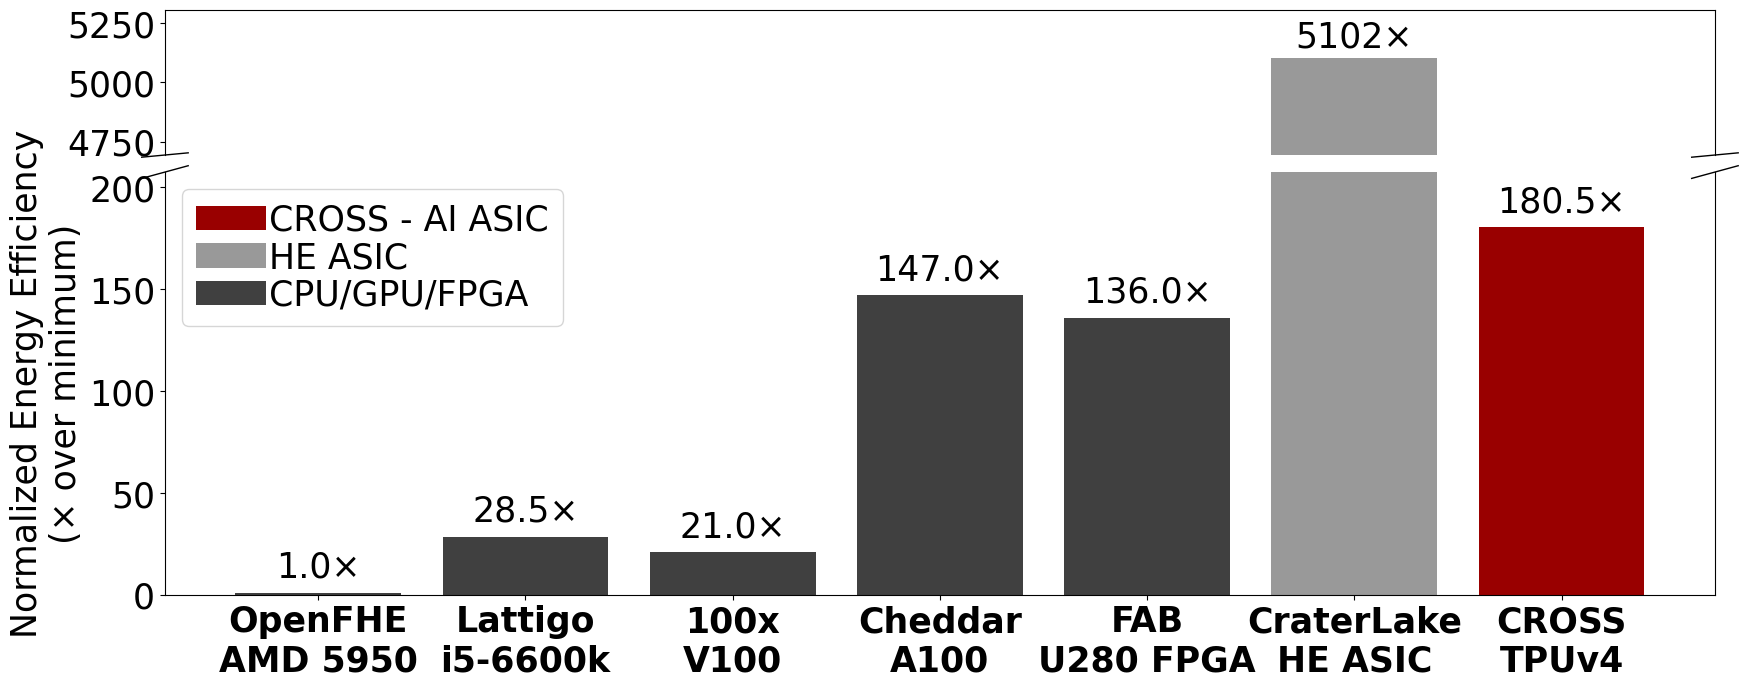

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ---- Your requested rc configs ----
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rc('font', size=25)

# First-row labels (libraries)
libraries = ["OpenFHE", "Lattigo", "100x", "Cheddar", "FAB", "CraterLake", "CROSS"]

# Device info from the table
devices = ["AMD 5950", "i5-6600k", "V100", "A100", "U280 FPGA", "HE ASIC", "TPUv4"]

# Energy efficiency values from the last row of your table
energy = np.array([0.02, 0.57, 0.42, 2.94, 2.72, 102.04, 3.61], dtype=float)

# Normalize to the minimal value
min_energy = energy.min()
norm = energy / min_energy

# ---- Colors per your rule ----
color_cross = "#990000"
color_crater = "0.6"   # medium gray
color_other = "0.25"   # dark gray

colors = []
for lib in libraries:
    if lib == "CROSS":
        colors.append(color_cross)
    elif lib == "CraterLake":
        colors.append(color_crater)
    else:
        colors.append(color_other)

# ---- Choose a sensible y-axis break automatically ----
sorted_norm = np.sort(norm)
second_largest = sorted_norm[-2]
max_val = sorted_norm[-1]

bottom_max = second_largest * 1.15
top_min = max_val * 0.92
top_max = max_val * 1.04

x = np.arange(len(libraries))

# ---- Create broken y-axis layout ----
fig = plt.figure(figsize=(20, 7.6))
gs = fig.add_gridspec(2, 1, height_ratios=[1.1, 3.2], hspace=0.06)

ax_top = fig.add_subplot(gs[0])
ax_bot = fig.add_subplot(gs[1], sharex=ax_top)

# Draw bars on both axes (same colors)
ax_bot.bar(x, norm, color=colors)
ax_top.bar(x, norm, color=colors)

# Set limits
ax_bot.set_ylim(0, bottom_max)
ax_top.set_ylim(top_min, top_max)

# Cosmetics: hide spines between axes
ax_top.spines.bottom.set_visible(False)
ax_bot.spines.top.set_visible(False)
ax_top.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Diagonal break marks
d = 0.015
kwargs = dict(transform=ax_top.transAxes, color="k", clip_on=False, linewidth=1)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bot.transAxes)
ax_bot.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bot.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# ---- X labels with device info appended ----
# Use a newline to keep labels readable; switch to f"{lib} ({dev})" if you prefer single-line.
xtick_labels = [f"{lib}\n{dev}" for lib, dev in zip(libraries, devices)]

ax_bot.set_xticks(x)
ax_bot.set_xticklabels(xtick_labels)

# Make x tick labels bolded black
for lbl in ax_bot.get_xticklabels():
    lbl.set_fontweight("bold")
    lbl.set_color("black")

# Labels
ax_bot.set_ylabel("Normalized Energy Efficiency\n(× over minimum)")

# ---- Annotate each bar with normalized value ----
for i, v in enumerate(norm):
    if v <= bottom_max * 0.98:
        ax_bot.text(
            i, v + bottom_max * 0.02,
            f"{v:.1f}×",
            ha="center", va="bottom"
        )
    else:
        ax_top.text(
            i, v + (top_max - top_min) * 0.03,
            f"{v:.0f}×",
            ha="center", va="bottom"
        )

# ---- Legend (CROSS / CraterLake / Others) ----
legend_handles = [
    Patch(facecolor=color_cross, label="CROSS - AI ASIC"),
    Patch(facecolor=color_crater, label="HE ASIC"),
    Patch(facecolor=color_other, label="CPU/GPU/FPGA"),
]

# Make sure plt.legend attaches to the bottom axis as the "current"
plt.sca(ax_bot)
plt.legend(
    handles=legend_handles,
    fontsize=25,
    columnspacing=0.1,
    labelspacing=0.1,
    handletextpad=0.1
)

# ---- Your requested finishing calls ----
plt.tight_layout()
plt.savefig('sota_cmp.pdf', bbox_inches="tight", transparent=True)
plt.show()
